In [0]:
'''
This is a small neural network coded from scratch. It is then compared to a neural network from TensorFlow

It does 4-class-clasification 

It contains just 1 hidden layer with 2 neurons - loss function in this layer is sigmoid loss function

The output layer contains 4 neurons that are used to clasify into 4 classes - uses softmax to clasify
'''

# Import Packages & SetUp

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
randomState = 0
np.random.seed(0)

# Data Prepration

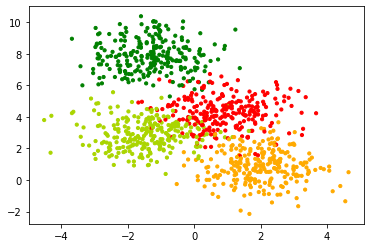

In [3]:
data1, labels1 = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=randomState)
plt.scatter(data1[:,0], data1[:,1], c=labels1, cmap=my_cmap, s=10)
plt.show()

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ ☝ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ ☝ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ ☝ <br>
Data is like this, with each class represented in different colours. There are 2 input parameters

In [4]:
X_train, X_validate, Y_train, Y_validate = train_test_split(data1, labels1, stratify=labels1, random_state=randomState)
print(Y_train.shape, Y_validate.shape)

(750,) (250,)


In [5]:
enc = OneHotEncoder()
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_OH_validate = enc.fit_transform(np.expand_dims(Y_validate,1)).toarray()
print(Y_OH_train.shape, Y_OH_validate.shape)

(750, 4) (250, 4)


# Neural Network - Compressed Version

In [0]:
class FeedForwardNeuralNetwork_compressed :
    def __init__(self):self.W1,self.W2,self.B1,self.B2=np.random.randn(2,2),np.random.randn(2,4),np.zeros((1,2)),np.zeros((1,4))
    def sigmoid(self,X):return(1.0)/(1.0+np.exp(-X))
    def softmax(self,X):return(np.exp(X)/np.sum(np.exp(X),axis=1).reshape(-1,1))
    def grad_sigmoid(self,X):return(X*(1-X))
    def fit(self,X_train,Y_train,epochs=1,learning_rate=1):
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):self.W2,self.W1,self.B2,self.B1=self.W2-learning_rate*np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1).T,self.softmax(np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1),self.W2)+self.B2)-Y_train)/X_train.shape[0],self.W1-learning_rate*np.matmul(X_train.T,np.multiply(np.matmul(self.softmax(np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1),self.W2)+self.B2)-Y_train,self.W2.T),self.grad_sigmoid(self.sigmoid(np.matmul(X_train,self.W1)+self.B1))))/X_train.shape[0],self.B2-learning_rate*np.sum(self.softmax(np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1),self.W2)+self.B2)-Y_train,axis=0).reshape(1,-1)/X_train.shape[0],self.B1-learning_rate*np.sum(np.multiply(np.matmul(self.softmax(np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1),self.W2)+self.B2)-Y_train,self.W2.T),self.grad_sigmoid(self.sigmoid(np.matmul(X_train,self.W1)+self.B1))),axis=0).reshape(1,-1)/X_train.shape[0]
    def predict(self,X_validate):return(np.array(self.softmax(np.matmul(self.sigmoid(np.matmul(X_validate,self.W1)+self.B1),self.W2)+self.B2)).squeeze())

In [0]:
ffnn_comp = FeedForwardNeuralNetwork_compressed()

# Comparison with TensorFlow

### Import TensorFlow

In [0]:
import tensorflow as tf
from tensorflow import keras

### Defining HyperParameters

In [0]:
#Define hyper parameters
Epochs = 2000
learningRate = 0.5

#No of Nodes in hidden layer(hl)
n_nodes_hl1 = 2

#No of output classes for classification problems
n_classes = 4

### Set the Neural Network Graph

In [10]:
tf.compat.v1.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph>

In [0]:
model = keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape = (X_train.shape[1],)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(n_nodes_hl1, activation='sigmoid'))

model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [0]:
optimiser = keras.optimizers.Adam(learning_rate=learningRate/X_train.shape[0])
    # Here, learning rate is divided by the number of rows as, in the model we have built, it is internaly doing the same
    # For TensorFlow we need to manually divide it here 
    # This is done as the learning for a model with more data points will be higher compared to a model with lesser number of data points. As data is more, the chances of 
        # learning is higher. So we divide it with the number of rows as each time an epoch runs, the learning will be equal to the learning rate only for any size of data
    # For example, a dataset with 1000 data items gets a chance to reduce it's loss 1000 times PER EPOCH, while a dataset with 500 data items gets to reduce it's loss only 
    # 500 times PER EPOCH. So we need to fix this and dividing it with the number of data points brings them to a constant value of reduction
model.compile( optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


# Fitting **Same Data** in both Models

### Neural Network - Self Coded 

In [14]:
%%time
ffnn_comp.fit(X_train, Y_OH_train, epochs=Epochs, learning_rate=learningRate)


CPU times: user 2.25 s, sys: 6.38 ms, total: 2.25 s
Wall time: 2.25 s


In [15]:
y_pred = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(y_pred,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  94.0 %


Accuracy achieved by model = 94.0% <br>
Time to execute the model = **2.25 seconds**

### Neural Network - TensorFlow 

In [16]:
%%time
history = model.fit(X_train, Y_OH_train, epochs=Epochs, verbose=0)

CPU times: user 1min 26s, sys: 15.9 s, total: 1min 42s
Wall time: 1min 16s


In [17]:
pred_y = model.predict(X_validate)
Y_pred = np.argmax(pred_y,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  93.60000000000001 %


Accuracy achieved by model = 93.6% <br>
Time to execute the model = 1min 16s = **76 seconds**

# Conclusion

As we see, the final accuracy achieved by a Neural Network of TensorFlow is 93.6%

The final accuracy achieved by the model coded by us is 94.0% (which is about the same as the TF version)

But the main advantage is achieved in the training time, where TF takes about 1min 16seconds, which is equal to **76 seconds**, to train the same data which could be done in **2.52 seconds**. So for any complex model, it is much easier and **faster** to train our model instead